# Overlaying speed traces of two laps

Compare two fastest laps by overlaying their speed traces.


In [34]:
import matplotlib.pyplot as plt
import numpy as np

import fastf1.plotting


# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

# load a session and its telemetry data
session = fastf1.get_session(2023, 'japan', 'R')
session.load()

core           INFO 	Loading data for Japanese Grand Prix - Race [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '44', '55', '63', '14', '31', '10', '40', '22', '24', '27', '20', '23', '2', '18', '11', '77']


First, we select the two laps that we want to compare



In [35]:
import pandas as pd

rq = pd.DataFrame(session.results)
rq.head(3)

d1 = rq.iloc[0,2]
d2 = rq.iloc[1,2]
d3 = rq.iloc[2,2]

# d1 = 'SAI'
# d2 = 'NOR'
# d3 = 'RUS'


d1_lap = session.laps.pick_driver(d1).pick_quicklaps()
d2_lap = session.laps.pick_driver(d2).pick_quicklaps()
d3_lap = session.laps.pick_driver(d3).pick_quicklaps()

# d1_lap=d1_lap[d1_lap['LapNumber']>43]
# d2_lap=d2_lap[d2_lap['LapNumber']>43]
# d3_lap=d3_lap[d3_lap['LapNumber']>43]

In [36]:
# rq.head()['Abbreviation']


Next we get the telemetry data for each lap. We also add a 'Distance' column
to the telemetry dataframe as this makes it easier to compare the laps.



Finally, we create a plot and plot both speed traces.
We color the individual lines with the driver's team colors.



In [37]:
d1_lap
d1_lap[d1_lap['LapNumber']>44]


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
44,0 days 02:21:10.546000,VER,1,0 days 00:01:35.915000,45.0,3.0,NaT,NaT,0 days 00:00:34.521000,0 days 00:00:42.808000,...,True,Red Bull Racing,0 days 02:19:34.631000,2023-09-24 06:20:36.040,1,1.0,False,,False,True
45,0 days 02:22:46.529000,VER,1,0 days 00:01:35.983000,46.0,3.0,NaT,NaT,0 days 00:00:34.541000,0 days 00:00:42.877000,...,True,Red Bull Racing,0 days 02:21:10.546000,2023-09-24 06:22:11.955,1,1.0,False,,False,True
46,0 days 02:24:22.749000,VER,1,0 days 00:01:36.220000,47.0,3.0,NaT,NaT,0 days 00:00:34.598000,0 days 00:00:43.001000,...,True,Red Bull Racing,0 days 02:22:46.529000,2023-09-24 06:23:47.938,1,1.0,False,,False,True
47,0 days 02:25:58.947000,VER,1,0 days 00:01:36.198000,48.0,3.0,NaT,NaT,0 days 00:00:34.643000,0 days 00:00:42.894000,...,True,Red Bull Racing,0 days 02:24:22.749000,2023-09-24 06:25:24.158,1,1.0,False,,False,True
48,0 days 02:27:35.636000,VER,1,0 days 00:01:36.689000,49.0,3.0,NaT,NaT,0 days 00:00:34.857000,0 days 00:00:43.114000,...,True,Red Bull Racing,0 days 02:25:58.947000,2023-09-24 06:27:00.356,1,1.0,False,,False,True
49,0 days 02:29:12.513000,VER,1,0 days 00:01:36.877000,50.0,3.0,NaT,NaT,0 days 00:00:34.934000,0 days 00:00:43.288000,...,True,Red Bull Racing,0 days 02:27:35.636000,2023-09-24 06:28:37.045,1,1.0,False,,False,True
50,0 days 02:30:49.153000,VER,1,0 days 00:01:36.640000,51.0,3.0,NaT,NaT,0 days 00:00:34.955000,0 days 00:00:43.057000,...,True,Red Bull Racing,0 days 02:29:12.513000,2023-09-24 06:30:13.922,1,1.0,False,,False,True
51,0 days 02:32:26.203000,VER,1,0 days 00:01:37.050000,52.0,3.0,NaT,NaT,0 days 00:00:35.115000,0 days 00:00:43.223000,...,True,Red Bull Racing,0 days 02:30:49.153000,2023-09-24 06:31:50.562,1,1.0,False,,False,True
52,0 days 02:34:02.503000,VER,1,0 days 00:01:36.300000,53.0,3.0,NaT,NaT,0 days 00:00:34.649000,0 days 00:00:42.899000,...,True,Red Bull Racing,0 days 02:32:26.203000,2023-09-24 06:33:27.612,1,1.0,False,,False,True


In [38]:
stints = session.laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()
stints = stints.rename(columns={"LapNumber": "StintLength"})

drivers= rq.head(3)['Abbreviation']

drivers=[d1,d2,d3]
print(stints)


   Driver  Stint Compound  StintLength
0     ALB    1.0   MEDIUM            1
1     ALB    2.0   MEDIUM           12
2     ALB    3.0     SOFT           13
3     ALO    1.0     SOFT           11
4     ALO    2.0     HARD           14
..    ...    ...      ...          ...
58    VER    3.0     HARD           16
59    ZHO    1.0     SOFT            1
60    ZHO    2.0     SOFT            9
61    ZHO    3.0     SOFT           19
62    ZHO    4.0     HARD           23

[63 rows x 4 columns]


In [39]:
# stints.loc[stints["Driver"] == d2]

In [40]:
# y.max(axis=0)

In [73]:
session.get_driver(d1)['LastName']

'Verstappen'

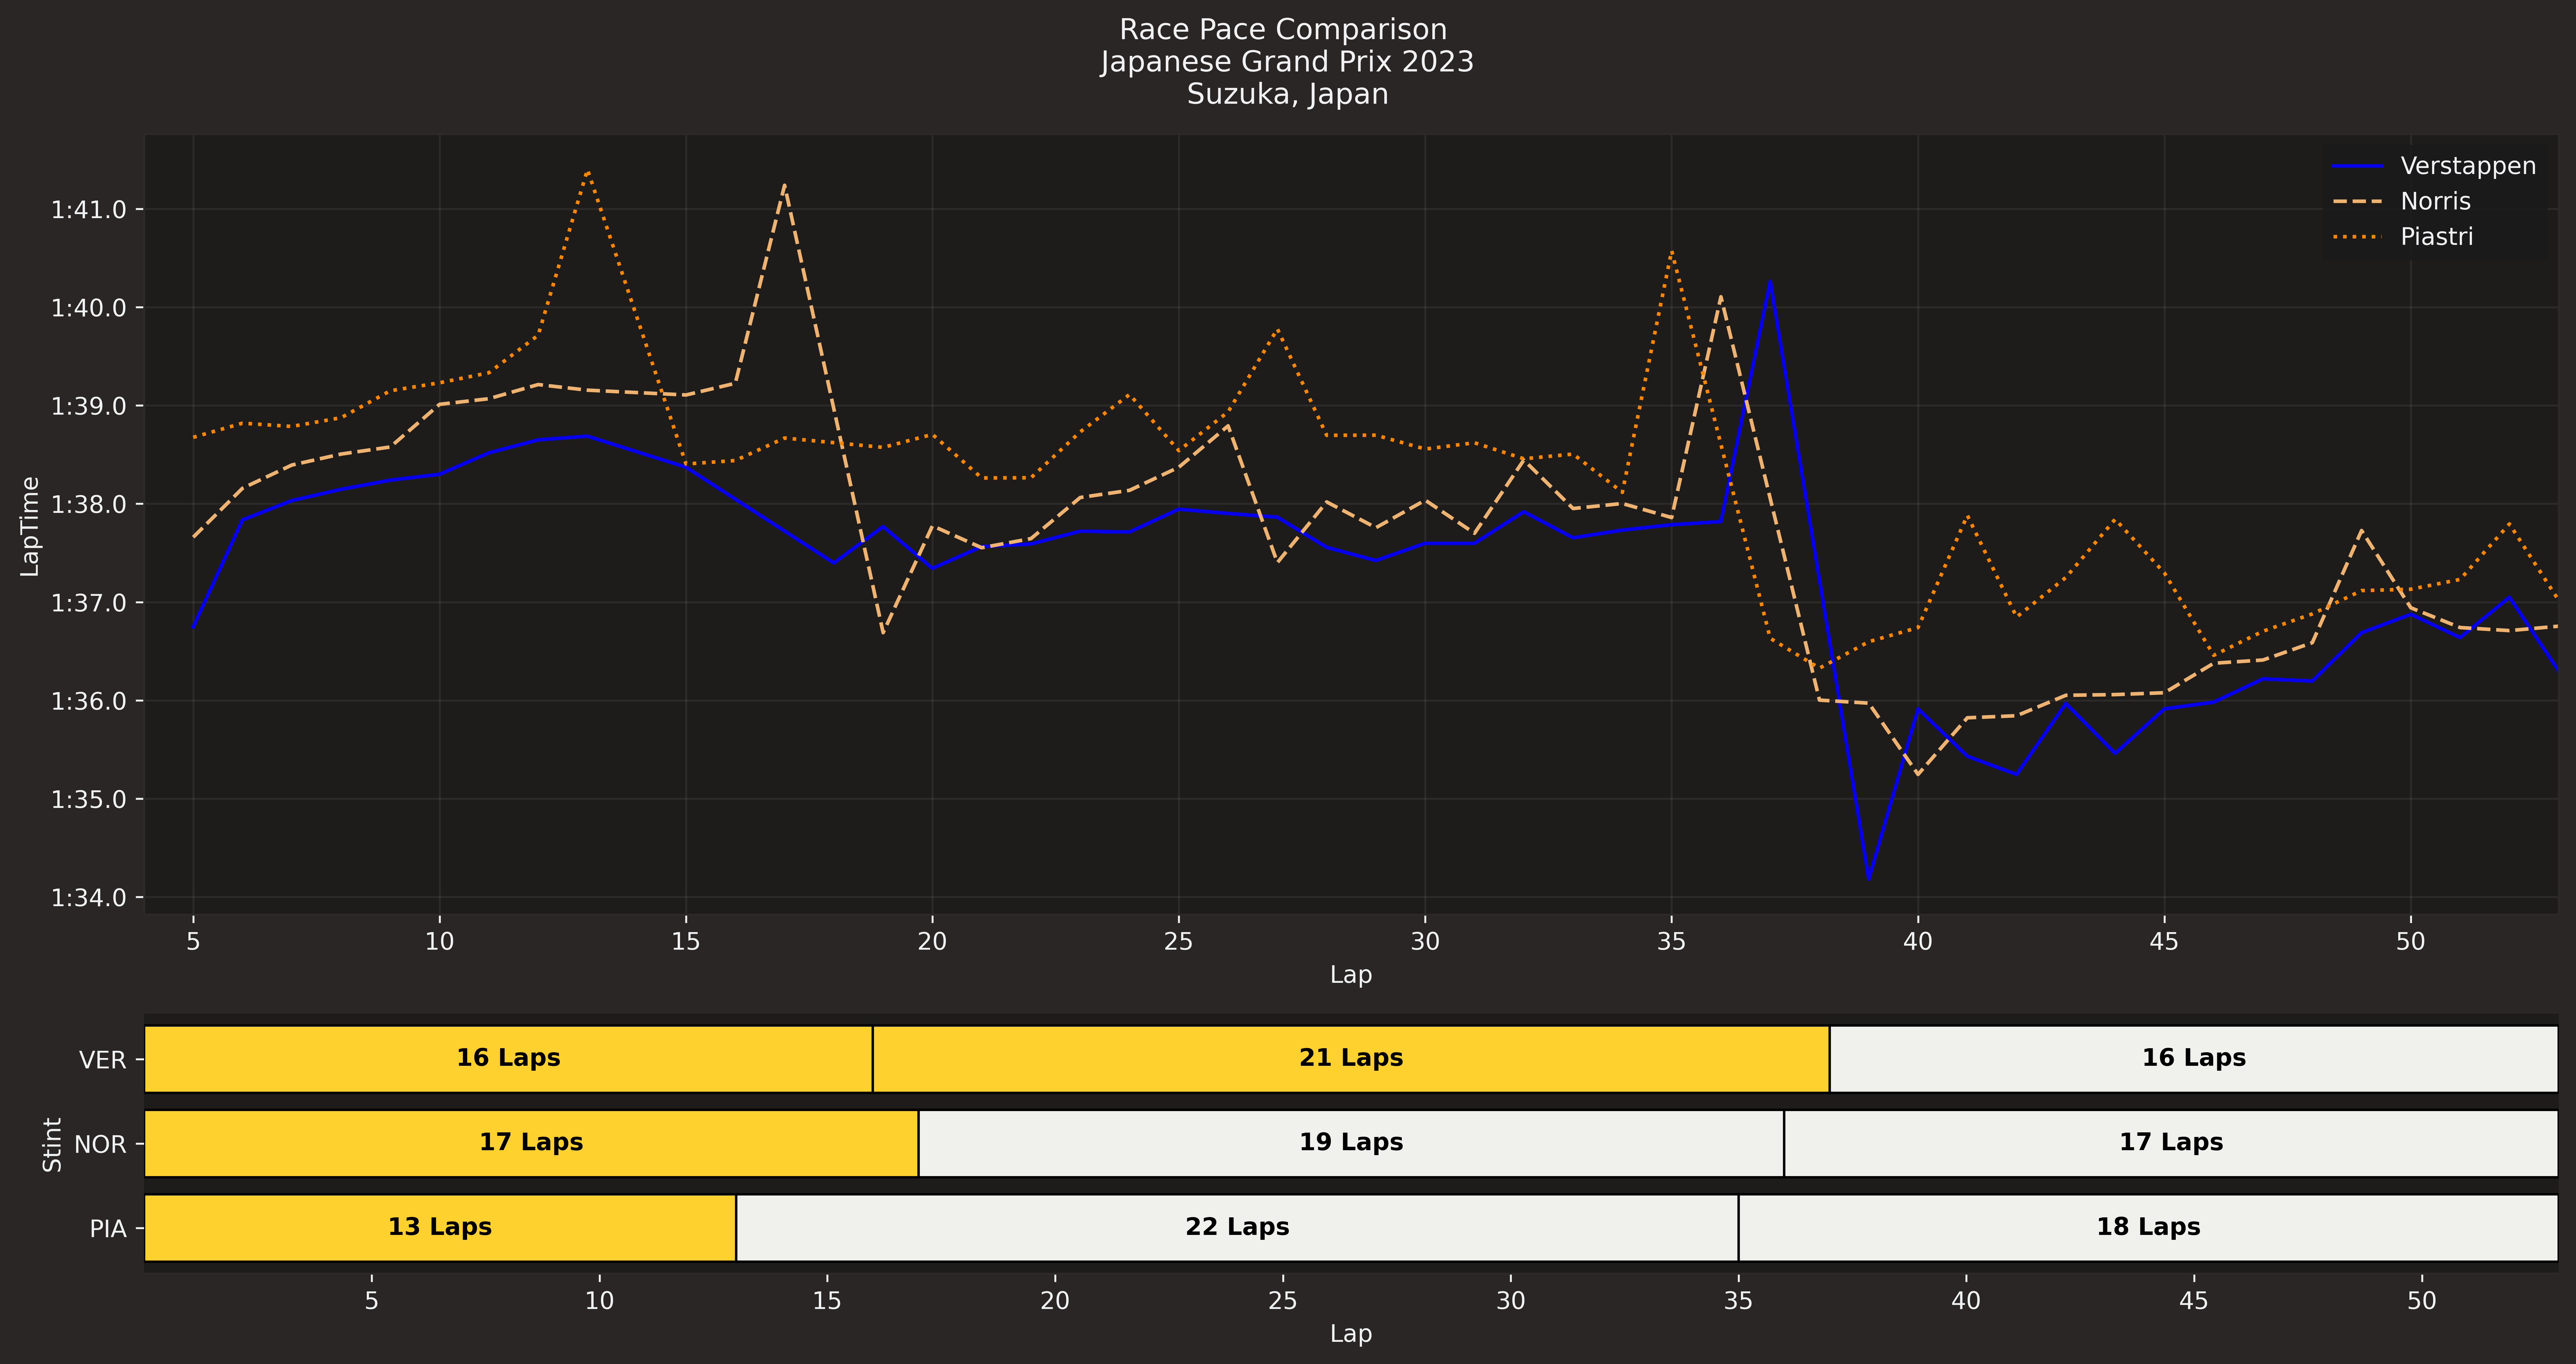

In [81]:
from datetime import timedelta
d1_color = fastf1.plotting.driver_color(d1)
d2_color = fastf1.plotting.driver_color(d2)
d3_color = fastf1.plotting.driver_color(d3)

d1lastname = session.get_driver(d1)['LastName']
d2lastname = session.get_driver(d2)['LastName']
d3lastname = session.get_driver(d3)['LastName']


# fig, ax = plt.subplots()
fig, (ax, ax2) = plt.subplots(2,1,figsize=(15.0, 8.0),dpi=600,height_ratios=[3, 1])

max_lap_number=max(d1_lap['LapNumber'])
min_lap_number=min(d1_lap['LapNumber'])

ax.plot(d1_lap['LapNumber'], d1_lap['LapTime'], color=d1_color, label=d1lastname, linewidth=1.5)
ax.plot(d2_lap['LapNumber'], d2_lap['LapTime'], color=d2_color, label=d2lastname,linestyle="--", linewidth=1.5)
ax.plot(d3_lap['LapNumber'], d3_lap['LapTime'], color=d3_color, label=d3lastname,linestyle=":",linewidth=1.5)

# #make Highlight
# x=d1_lap['LapNumber'].values
# y=d3_lap['LapTime']
# y2=d1_lap['LapTime']
# ax.fill_between(x, y2.min(axis=0), y.max(axis=0), where=(x >= 38) & (x <= 55), color='green', alpha=0.2)


ax.set_xlabel('Lap')
ax.set_ylabel('LapTime')
ax2.set_xlabel('Lap')
ax2.set_ylabel('Stint')



# Set x-axis tick locations and labels
xtick_positions = np.arange(min_lap_number, max_lap_number + 1, 5)
ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_positions.astype(int))  # Convert to integers



ax2.set_xticks(xtick_positions)
ax2.set_xticklabels(xtick_positions.astype(int))  # Convert to integers

ax.legend()


for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        ax2.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )

# Add text label inside the bar
        if previous_stint_end+row["StintLength"]/2 > 4:
            ax2.text(previous_stint_end+row["StintLength"]/2, driver, str(row["StintLength"])+" Laps", ha='center', va='center', color='Black', fontweight='bold')

        previous_stint_end += row["StintLength"]




ax.set_xlim(min_lap_number-1, max_lap_number)
ax2.set_xlim(0, max_lap_number)

ax.grid(True, alpha=0.10)
ax2.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax2.invert_yaxis()

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

plt.suptitle(f"Race Pace Comparison \n "
             f"{session.event['EventName']} {session.event.year} \n {session.event['Location']}, {session.event['Country']} ")


plt.tight_layout()
plt.show()